# Modeling:
### linear regression with cross validating

In [250]:
import numpy as np
import math

import pandas as pd
from pandas.api.types import CategoricalDtype

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold


# Plot settings
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 12

In [251]:
def standardize_columns(data):
    '''
    Input:
      data (data frame): contains only numeric columns
    Output:
      data frame, the same data, except each column is standardized
      to have 0-mean and unit variance
    '''
    #your code goes here [1 line should suffice]
    standardized_data = (data-data.mean())/ data.std()
    return standardized_data

In [238]:
full_data = pd.read_csv("../visual/full_data_Pop.csv")
train, test = train_test_split(full_data, test_size=0.2)

In [249]:
train.shape

(6647, 27)

In [240]:
train.dtypes

Unnamed: 0            int64
artist_name          object
track_uri            object
artist_uri           object
name                 object
album_uri            object
duration_ms           int64
album_name           object
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
track_popularity    float64
id                   object
popularity            int64
explicit              int64
id_artists           object
release_date         object
key                   int64
mode                  int64
time_signature        int64
dtype: object

In [241]:
def fix_year(data):
    data['release_date'] = pd.to_datetime(data['release_date']) # convert 'dates' column to datetime dtype
    data['year'] = data['release_date'].dt.year # extract year value into new 'year' column
    return data

In [252]:

def process_data_fm(data):

    data = fix_year(data)

    data = (
        data.pipe(select_columns,'popularity','duration_ms','explicit','year'
                  ,'danceability','energy','instrumentalness'
                  ,'liveness','loudness','speechiness','tempo','valence'
                  )
    )
    data.columns.values
    x = standardize_columns(data).drop(['popularity'], axis=1)
    # x = data.drop(['popularity'], axis=1)
    y = data['popularity']
    return x,y

In [253]:
def select_columns(data, *columns):
    return data.reindex(columns = columns)

In [259]:
def rmse(actual, predicted):
    """
    Calculates RMSE from actual and predicted values
    Input:
      actual (1D array-like): vector of actual values
      predicted (1D array-like): vector of predicted/fitted values
    Output:
      a float, the root-mean square error
    """
    MSE = np.square(np.subtract(actual,predicted)).mean()
    rmse = math.sqrt(MSE)
    return rmse

## Training the model "final_model" with extracted data.
split data to train and test and calculate RSME of the model

In [255]:
X_train, y_train = process_data_fm(train)
X_test, y_test = process_data_fm(test)

In [256]:
alphas = np.arange(.2, 200.1, .1)
final_model = lm.LassoCV(alphas=alphas, cv=5)

# Fit and predict
final_model.fit(X_train, y_train)
y_predicted = final_model.predict(X_test)

print(f'The validation RMSE for this model with '
      f'alpha={round(float(final_model.alpha_), 2)} is '
      f'{round(rmse(y_test, y_predicted), 2)}.')

The validation RMSE for this model with alpha=0.2 is 11.05.


Text(0, 0.5, 'RMSE')

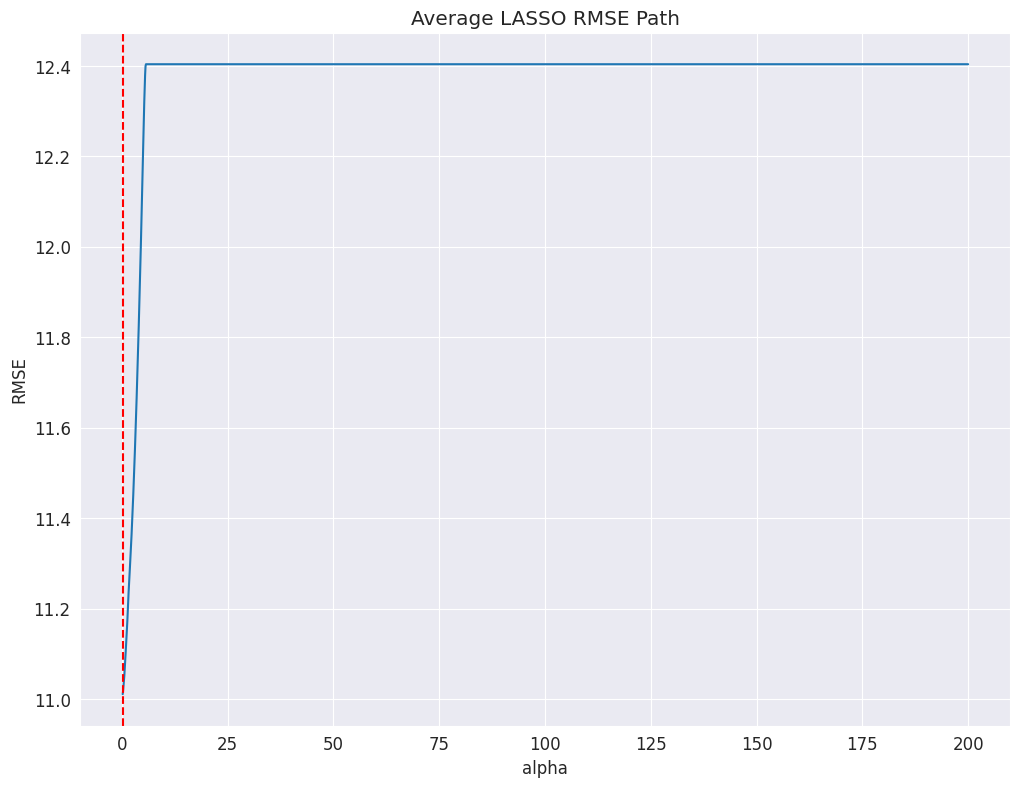

In [257]:
optimal_alpha = round(float(final_model.alpha_), 2)
plt.plot(final_model.alphas_, np.sqrt(np.apply_along_axis(np.mean, 1, final_model.mse_path_)))
plt.axvline(x=optimal_alpha, color='red', linestyle='dashed')
ax = plt.gca()
ax.set_title('Average LASSO RMSE Path')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')

## Use "final_model" to predict the popularity of kaggle data and evaluate to predict with real popularity.


The validation RMSE for this model with alpha=0.2 is 29.56.


Text(0, 0.5, 'RMSE')

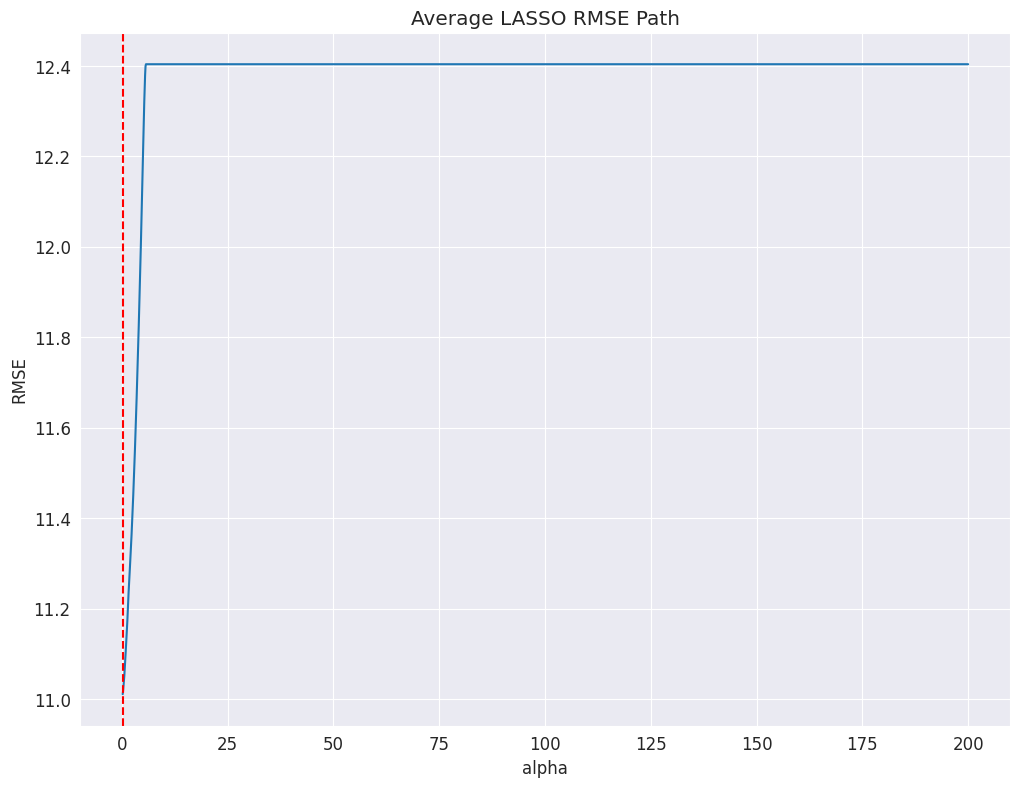

In [260]:
data_good = pd.read_csv("tracks.csv")
# train_good, test_good = train_test_split(data_good, test_size=0.2)

X_test_good, y_test_good = process_data_fm(data_good)

# predict popularity with other data in model
good_data_predict = final_model.predict(X_test_good)


print(f'The validation RMSE for this model with '
      f'alpha={round(float(final_model.alpha_), 2)} is '
      f'{round(rmse(y_test_good, good_data_predict), 2)}.')
optimal_alpha = round(float(final_model.alpha_), 2)
plt.plot(final_model.alphas_, np.sqrt(np.apply_along_axis(np.mean, 1, final_model.mse_path_)))
plt.axvline(x=optimal_alpha, color='red', linestyle='dashed')
ax = plt.gca()
ax.set_title('Average LASSO RMSE Path')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')


## Training the model "good_model" with Kaggle data.
split data to train and test and calculate RSME of the model

The validation RMSE for this model with alpha=0.1 is 14.51.


Text(0.5, 0, 'alpha')

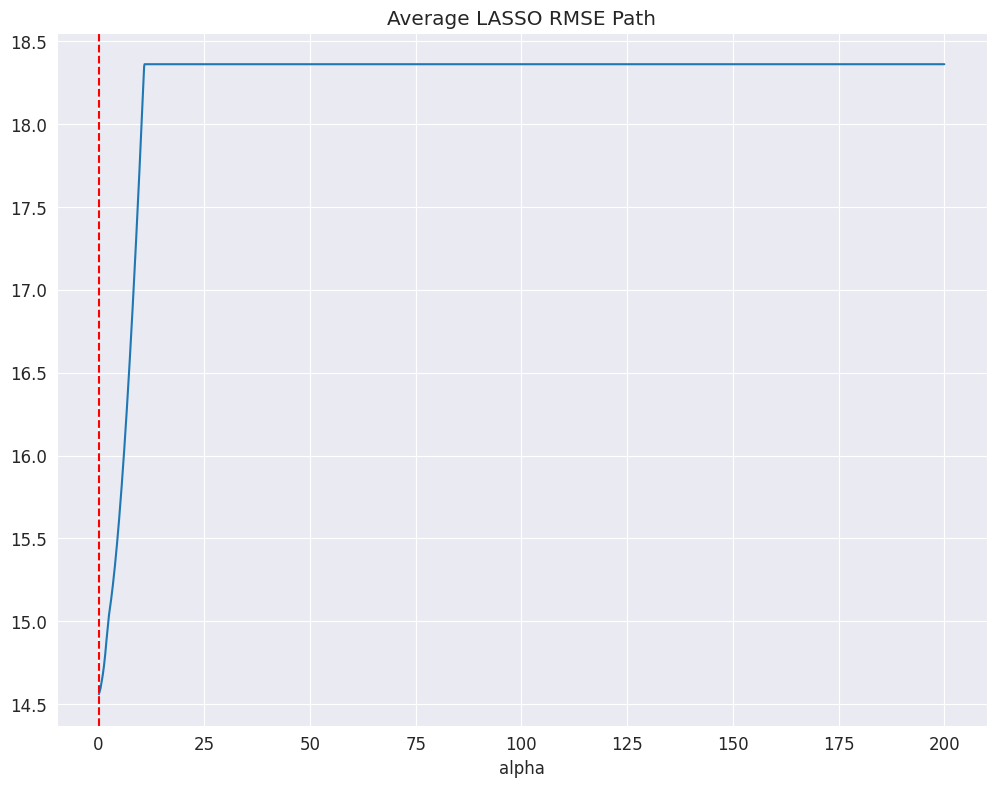

In [248]:
data_good = pd.read_csv("tracks.csv")
train_good, test_good = train_test_split(data_good, test_size=0.2)
train_good.head()
train_good.dtypes


def fix_year(data):
    data['release_date'] = pd.to_datetime(data['release_date'])  # convert 'dates' column to datetime dtype
    data['year'] = data['release_date'].dt.year  # extract year value into new 'year' column
    return data


def process_data_fm(data):
    data = fix_year(data)

    data = (
        data.pipe(select_columns, 'popularity', 'duration_ms', 'explicit', 'year'
                  , 'danceability', 'energy', 'instrumentalness'
                  , 'liveness', 'loudness', 'speechiness', 'tempo', 'valence'
                  )
    )

    x = standardize_columns(data).drop(['popularity'], axis=1)
    y = data['popularity']
    return x, y


def select_columns(data, *columns):
    return data.reindex(columns=columns)


def rmse(actual, predicted):
    """
    Calculates RMSE from actual and predicted values
    Input:
      actual (1D array-like): vector of actual values
      predicted (1D array-like): vector of predicted/fitted values
    Output:
      a float, the root-mean square error
    """
    MSE = np.square(np.subtract(actual, predicted)).mean()
    rmse = math.sqrt(MSE)
    return rmse


X_train_good, y_train_good = process_data_fm(train_good)
X_test_good, y_test_good = process_data_fm(test_good)
alphas = np.arange(0.1, 200.1, .1)
good_model = lm.LassoCV(alphas=alphas, cv=5)

# Fit and predict
good_model.fit(X_train_good, y_train_good)
y_predicted_good = good_model.predict(X_test_good)

print(f'The validation RMSE for this model with '
      f'alpha={round(float(good_model.alpha_), 2)} is '
      f'{round(rmse(y_test_good, y_predicted_good), 2)}.')
optimal_alpha = round(float(good_model.alpha_), 2)
plt.plot(good_model.alphas_, np.sqrt(np.apply_along_axis(np.mean, 1, good_model.mse_path_)))
plt.axvline(x=optimal_alpha, color='red', linestyle='dashed')
ax = plt.gca()
ax.set_title('Average LASSO RMSE Path')
ax.set_xlabel('alpha')
